# Miscellaneous Testing for Github Data

Import packages, call database.

In [9]:
from pymongo import MongoClient

# Plots and styling
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Math
import pandas as pd
import numpy as np

# Secret URL and simple query tooling
from lib.secrets import *
from lib.qtools import *



client = MongoClient(local_mdb_url)
db=client.ghtorrent

Pull Overview on **Issues**

<AxesSubplot:ylabel='count'>

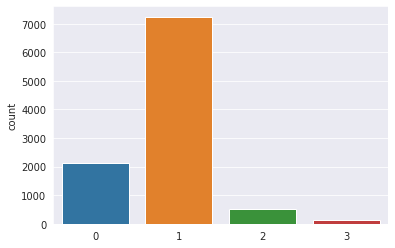

In [34]:
# Get collection 'users'
users = db.users

total_users = users.count()

data = {
    'count': []
}

for i in range(4):
    data['count'].append(users.count_documents({'public_repos': i}))


df = pd.DataFrame(data)
sns.barplot(data=df, x=list(df.index), y='count')

In [37]:
commits = db.commits

pprint(commits.find_one())

{'_id': ObjectId('5d1819086480fd0cf42e9d43'),
 'author': {'avatar_url': 'https://avatars3.githubusercontent.com/u/44714584?v=4',
            'events_url': 'https://api.github.com/users/Sam-Marx/events{/privacy}',
            'followers_url': 'https://api.github.com/users/Sam-Marx/followers',
            'following_url': 'https://api.github.com/users/Sam-Marx/following{/other_user}',
            'gists_url': 'https://api.github.com/users/Sam-Marx/gists{/gist_id}',
            'gravatar_id': '',
            'html_url': 'https://github.com/Sam-Marx',
            'id': 44714584,
            'login': 'Sam-Marx',
            'node_id': 'MDQ6VXNlcjQ0NzE0NTg0',
            'organizations_url': 'https://api.github.com/users/Sam-Marx/orgs',
            'received_events_url': 'https://api.github.com/users/Sam-Marx/received_events',
            'repos_url': 'https://api.github.com/users/Sam-Marx/repos',
            'site_admin': False,
            'starred_url': 'https://api.github.com/users/Sam-M

In [40]:
import os
from github import Github


token = os.getenv('GITHUB_TOKEN')
g = Github(token)

repo = g.get_repo("cdr/code-server")
issues = repo.get_issues(state="open")
pprint(issues.get_page(0))

[Issue(title="feat(testing): add unit tests for emitter", number=2715),
 Issue(title="☂️ [Roadmap] Improve Testing", number=2712),
 Issue(title="code-server for azure app service", number=2711),
 Issue(title="create script to install code-server with link", number=2709),
 Issue(title="Be able to set --host with --link", number=2708),
 Issue(title="request to upgrade to Visual Studio Code 1.53", number=2703),
 Issue(title="Code server does not start after upgrading to 3.8.1 from 3.8.0", number=2697),
 Issue(title="docs: clarify Alpine install path in install.md", number=2696),
 Issue(title="Opening file from command line does not work after reusing the current window for a new directory (ie. `code-server -r newdir`)", number=2694),
 Issue(title="Open editor tab from command line with contents from stdin", number=2693),
 Issue(title="Crash when open big file", number=2687),
 Issue(title="Document how to use code-server with Heroku", number=2686),
 Issue(title="CI docs: Update publishing 